<a href="https://colab.research.google.com/github/philsaurabh/Machine-Learning-Tutorials/blob/main/Stockmarket_SVM_KNN_NB_DT_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

This data is about Stock market data. It contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

In [2]:
weekly = pd.read_csv("https://raw.githubusercontent.com/philsaurabh/Machine-Learning-Tutorials/main/Weekly.csv")
weekly.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,4,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,5,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [3]:
# Make categorical outputs numerical
weekly['Direction'] = weekly.Direction.map({'Up':1,'Down':0})
weekly['Direction'].value_counts()

1    605
0    484
Name: Direction, dtype: int64

In [4]:
# Train data creates the model
# Test data tests the accuracy of the model
weekly_train = weekly[weekly['Year']<2005]
weekly_test = weekly[weekly['Year']>=2005]

In [5]:
print('train size: {0}  test size {1}'.format(weekly_train.shape[0],weekly_test.shape[0]))

train size: 776  test size 313


In [6]:
# Use Direction as the response and the five lag variables plus Volume as predictors
X_train = weekly_train[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']]
y_train = weekly_train[['Direction']]
X_test = weekly_test[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']]
y_test = weekly_test[['Direction']]

# SVM

In [25]:
# SVM
# Fit the model on the train data (scikit-learn estimation)
from sklearn.svm import SVC
clf = SVC(probability=True)
clf.fit(X_train,y_train.values.ravel())
print(clf)

SVC(probability=True)


In [26]:
# Variable to predict slk model using X_test perdictors
clf_pred = clf.predict(X_test)

# Find the training and test set score
print("Training accuracy score: {:.3f}".format(clf.score(X_train,y_train)))
print("Test accuracy score: {:.3f}".format(clf.score(X_test,y_test)))

# Show the confusion matrix
cm_df = pd.DataFrame(confusion_matrix(y_test, clf_pred).T, index=clf.classes_,columns=clf.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)

# Additional statistics
print('\n',classification_report(y_test, clf_pred)) 

Training accuracy score: 0.662
Test accuracy score: 0.553

Confusion table:
 True         0    1
Predicted          
0           20   19
1          121  153

               precision    recall  f1-score   support

           0       0.51      0.14      0.22       141
           1       0.56      0.89      0.69       172

    accuracy                           0.55       313
   macro avg       0.54      0.52      0.45       313
weighted avg       0.54      0.55      0.48       313



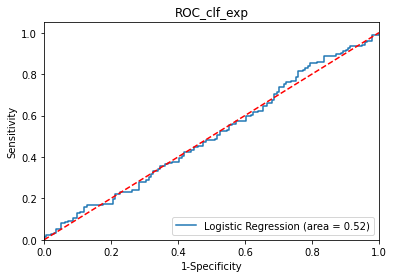

In [27]:
# Exp, ROC curve and AUC
clf_roc_auc_exp = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % clf_roc_auc_exp)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC_clf_exp')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# GaussianNB

In [19]:
# Fit the model on the train data (scikit-learn estimation)
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train.values.ravel())
print(clf)

GaussianNB()


In [20]:
# Variable to predict slk model using X_test perdictors
clf_pred = clf.predict(X_test)

# Find the training and test set score
print("Training accuracy score: {:.3f}".format(clf.score(X_train,y_train)))
print("Test accuracy score: {:.3f}".format(clf.score(X_test,y_test)))

# Show the confusion matrix
cm_df = pd.DataFrame(confusion_matrix(y_test, clf_pred).T, index=clf.classes_,columns=clf.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)

# Additional statistics
print('\n',classification_report(y_test, clf_pred)) 

Training accuracy score: 0.558
Test accuracy score: 0.524

Confusion table:
 True         0    1
Predicted          
0           21   29
1          120  143

               precision    recall  f1-score   support

           0       0.42      0.15      0.22       141
           1       0.54      0.83      0.66       172

    accuracy                           0.52       313
   macro avg       0.48      0.49      0.44       313
weighted avg       0.49      0.52      0.46       313



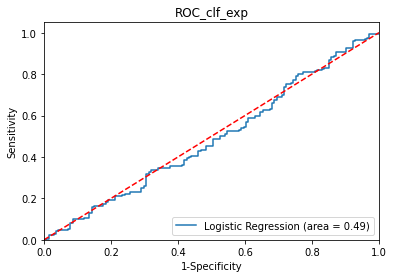

In [21]:
# Exp, ROC curve and AUC
clf_roc_auc_exp = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % clf_roc_auc_exp)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC_clf_exp')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train.values.ravel())
print(clf)

KNeighborsClassifier(n_neighbors=3)


In [17]:
# Variable to predict slk model using X_test perdictors
clf_pred = clf.predict(X_test)

# Find the training and test set score
print("Training accuracy score: {:.3f}".format(clf.score(X_train,y_train)))
print("Test accuracy score: {:.3f}".format(clf.score(X_test,y_test)))

# Show the confusion matrix
cm_df = pd.DataFrame(confusion_matrix(y_test, clf_pred).T, index=clf.classes_,columns=clf.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)

# Additional statistics
print('\n',classification_report(y_test, clf_pred)) 

Training accuracy score: 0.737
Test accuracy score: 0.518

Confusion table:
 True        0   1
Predicted        
0          63  73
1          78  99

               precision    recall  f1-score   support

           0       0.46      0.45      0.45       141
           1       0.56      0.58      0.57       172

    accuracy                           0.52       313
   macro avg       0.51      0.51      0.51       313
weighted avg       0.52      0.52      0.52       313



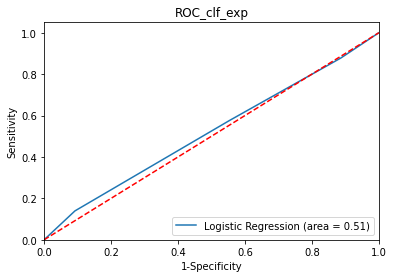

In [18]:
# Exp, ROC curve and AUC
clf_roc_auc_exp = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % clf_roc_auc_exp)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC_clf_exp')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train.values.ravel())
print(clf)

DecisionTreeClassifier(random_state=0)


In [14]:
# Variable to predict slk model using X_test perdictors
clf_pred = clf.predict(X_test)

# Find the training and test set score
print("Training accuracy score: {:.3f}".format(clf.score(X_train,y_train)))
print("Test accuracy score: {:.3f}".format(clf.score(X_test,y_test)))

# Show the confusion matrix
cm_df = pd.DataFrame(confusion_matrix(y_test, clf_pred).T, index=clf.classes_,columns=clf.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)

# Additional statistics
print('\n',classification_report(y_test, clf_pred)) 

Training accuracy score: 1.000
Test accuracy score: 0.524

Confusion table:
 True         0    1
Predicted          
0           37   45
1          104  127

               precision    recall  f1-score   support

           0       0.45      0.26      0.33       141
           1       0.55      0.74      0.63       172

    accuracy                           0.52       313
   macro avg       0.50      0.50      0.48       313
weighted avg       0.51      0.52      0.50       313



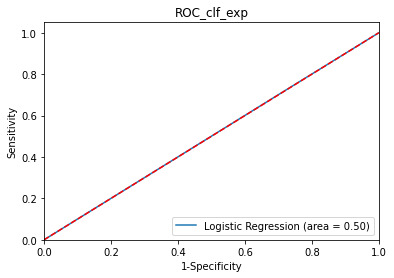

In [15]:
# Exp, ROC curve and AUC
clf_roc_auc_exp = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % clf_roc_auc_exp)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC_clf_exp')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()